<a href="https://colab.research.google.com/github/toddwalters/pgaiml-python-coding-examples/blob/main/deep-learning/C8/12_06_Building_and_Visualizing_an_Autoencoder_with_the_Fashion_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Building and Visualizing an Autoencoder with the Fashion MNIST Dataset__

Autoencoders are a special type of neural network used for:

- Data compression
- Feature extraction
- Dimensionality reduction
- Learning generative models of data


## Steps to Be Followed
1. Importing libraries
2. Loading the dataset and finding the shape of the data
3. Initializing the autoencoder
4. Compiling the autoencoder
5. Training the model
6. Visualizing the images

###Step 1: Importing Libraries
- Import the required library such as NumPy, Pandas, TensorFlow,and Matplotlib

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

### Step 2: Loading the Dataset and Finding the Shape of the Data

- Dataset used: Fashion MNSIT dataset where each image is 28 *28 pixels
- Find the shape of the train and test data.

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


__Observation:__
- Here, the shape function retrieves the number of rows and columns present in the train and test data.

### Step 3: Initializing the Autoencoder
- Define the value of __latent_dim__ as __64__
- Define a class called __Autoencoder__ that extends the __Model__ class from TensorFlow
- Inside the Autoencoder class, define the constructor (__init__) that takes __latent_dim__ as a parameter
- In the constructor, set __self.latent_dim__ to the value of __latent_dim__
- Define the encoder part of the autoencoder using __tf.keras.Sequential__
- In the encoder, flatten the input using __layers.Flatten()__
- Add a dense layer to the encoder with latent_dim units and ReLU activation using __layers.Dense(latent_dim, activation='relu')__
- Define the decoder part of the autoencoder using __tf.keras.Sequential__
- In the decoder, add a dense layer with __784__ units and sigmoid activation using __layers.Dense(784, activation='sigmoid')__
- Reshape the output of the dense layer to a 28x28 shape using __layers.Reshape((28, 28))__
- Define the call method of the __Autoencoder__ class
- Inside the call method, pass the input x through the encoder to obtain the encoded representation
- Pass the encoded representation through the decoder to obtain the reconstructed output
- Return the reconstructed output
- Create an instance of the __Autoencoder__ class called autoencoder, passing the value of __latent_dim__ as an argument

In [ ]:
latent_dim = 64

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

__Observations:__
- The code does not produce any output by itself. It defines a class and creates an instance of that class.
- The output will depend on how the autoencoder model is trained and used further in the code.

### Step 4: Compiling the Autoencoder
- Call the __compile()__ method on the autoencoder object.
- Set the optimizer argument to __adam__. This specifies that the Adam optimizer will be used for training the autoencoder.
- Set the loss argument to __losses.MeanSquaredError()__. This specifies that the mean squared error loss function will be used for training the autoencoder.

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

__Observation:__
- It configures the autoencoder model for training by setting the optimizer and loss function.

### Step 5: Training the Model
- Call the __fit()__ method on the autoencoder object.
- Pass __x_train__ as the first argument. x_train represents the input data for training the autoencoder.
- Pass __x_train__ again as the second argument. This is the target data for the autoencoder, which is also x_train in this case.
- Set the __epochs__ argument to __10__. This specifies the number of times the entire dataset will be iterated during training.
- Set the __shuffle__ argument to __True__. This indicates that the training data will be shuffled before each epoch during training.
- Set the validation_data argument to __(x_test, x_test)__. This provides the validation data to evaluate the performance of the autoencoder during training. x_test is the input validation data, and x_test is also used as the target validation data.

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0237 - val_loss: 0.0133
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0117 - val_loss: 0.0106
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0101 - val_loss: 0.0097
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0089 - val_loss: 0.0091
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0087 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.008

__Observations:__
- The __fit()__ method trains the autoencoder model on the provided data and produces output.
- During training, it displays information such as the loss and metrics for each epoch, the progress bar, and validation metrics if validation data is provided.
- The final output is the trained autoencoder model with updated weights.

### Step 6: Encoding and Decoding the Images
- Call the encoder method of the autoencoder object on __x_test__. This encodes the input x_test using the trained autoencoder's encoder part.
- Call the __numpy()__ method on the encoded output to convert it into a NumPy array.
- This is done to extract the actual values from the TensorFlow tensor.
- Assign the encoded output to the variable __encoded_imgs__.
- Call the decoder method of the autoencoder object on encoded_imgs. This decodes the encoded images using the trained autoencoder's decoder part.
- Call the numpy() method on the decoded output to convert it into a NumPy array.
- Assign the decoded output to the variable __decoded_imgs__.

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

### Step 7: Displaying the Images

- Set up the figure and subplot layout
- Iterate through a range of n (in this case, 10) for displaying original and reconstructed images
- Display the original image in the current subplot, along with the __original__ title and grayscale colormap
- Display the reconstructed image in the next subplot, along with the __reconstructed__ title and grayscale colormap

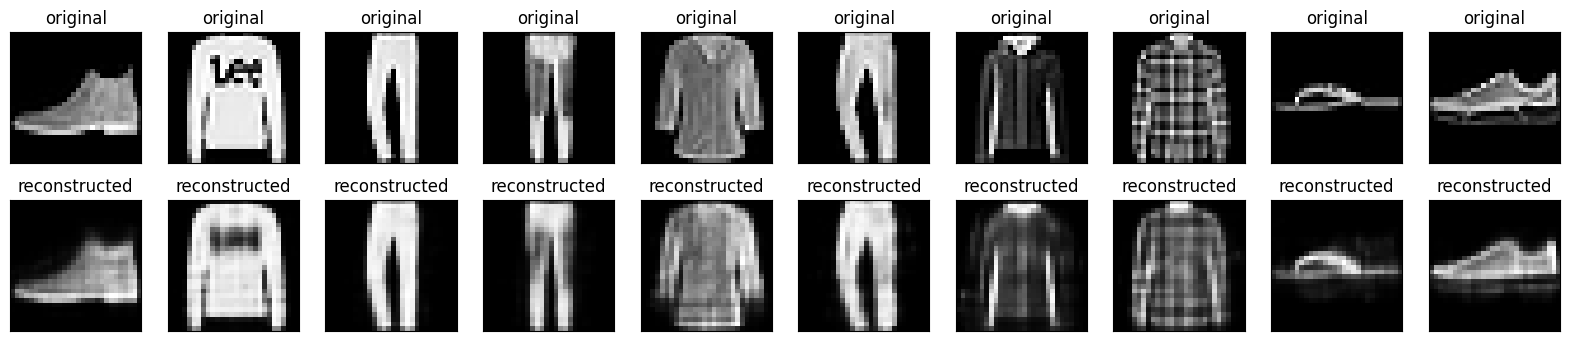

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

__Observations:__
- The code generates a figure that showcases n original images alongside their corresponding reconstructed images, with the __original__ and __reconstructed__ titles.
- The images are displayed in grayscale.